### 肘部-轮廓系数分析法使用示例

 当 n_clusters =  2 时，轮廓系数为:  0.21499236066214983
 当 n_clusters =  3 时，轮廓系数为:  0.2308725928143064
 当 n_clusters =  4 时，轮廓系数为:  0.24886580721328388
 当 n_clusters =  5 时，轮廓系数为:  0.2678865930894763
 当 n_clusters =  6 时，轮廓系数为:  0.27388928486968983


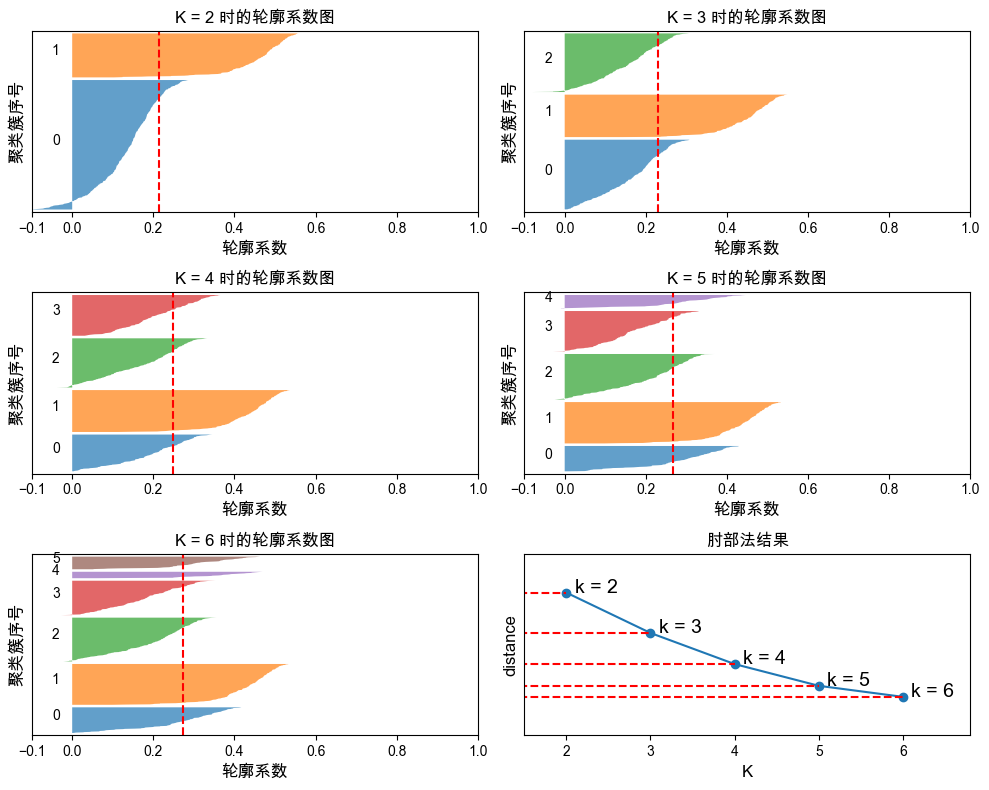

In [2]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from C12_elbow_analysis import elbow_analysis
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np


def silhouette_elbow__analysis(X, range_n_clusters, all_cluster_labels, all_centers):
    """
    :param X:  原始样本
    :param range_n_clusters:  K的取值情况， list
    :param all_cluster_labels:  簇标签结果 list
    :param all_centers: 每种K值情况下的簇中心 list
    :return:
    """
    assert len(all_cluster_labels) == len(all_centers) == len(range_n_clusters)
    plt.figure(figsize=(10, 8))
    row_plot = 3  # 子图的行数
    all_dist = []
    for n, n_clusters in enumerate(range_n_clusters):
        # ================= 轮廓分析法 ============================
        cluster_labels = all_cluster_labels[n]
        plt.subplot(row_plot, (len(range_n_clusters) + 1) // row_plot, n + 1)
        plt.xlim([-0.1, 1])  # 设置x轴的范围（轮廓系数）
        plt.ylim([0, len(X) + (n_clusters + 1) * 10])  # 顶端的间隙
        silhouette_avg = silhouette_score(X, cluster_labels)  # 所有样本的轮廓系数均值
        print(" 当 n_clusters = ", n_clusters, "时，轮廓系数为: ", silhouette_avg)
        # 计算每个样本对应的轮廓系数
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):  # 遍历每一个簇
            # 取第i个簇中对应所有样本的轮廓系数，并进行排序
            s_values = sample_silhouette_values[cluster_labels == i]
            s_values.sort()
            size_cluster_i = s_values.shape[0]  # 得到第i个簇的样本数量
            y_upper = y_lower + size_cluster_i  # 图中每个簇在y轴上的宽度
            # 限定y的范围，填充x1和x2所围成的区域
            plt.fill_betweenx(y=np.arange(y_lower, y_upper), x1=0, x2=s_values, alpha=0.7)
            # 在y轴右侧标记每个簇的序号
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # 计算下一个条形图y轴的其实值
            y_lower = y_upper + 10  # 10 for the 0 samples
        fm.fontManager.addfont('../data/SimHei.ttf')
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来  正常显示中文标签
        plt.title(f"K = {n_clusters} 时的轮廓系数图", fontsize=12)
        plt.xlabel("轮廓系数", fontsize=12)
        plt.ylabel("聚类簇序号", fontsize=12)
        # 以x=silhouette_avg 画一条平行于y轴的线
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  # 去掉y轴的刻度
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # 设置x轴的刻度

        # ============  肘部法计算簇内距离和并可视化  =========================
        dist = 0
        centers = all_centers[n]
        for i in range(n_clusters):  # 遍历每一个簇，计算当前簇的簇内距离
            x_data = X[cluster_labels == i]
            tmp = np.sum((x_data - centers[i]) ** 2, axis=1)
            dist += np.sum(np.sqrt(tmp))  # 累计当前聚类结果下所有簇的簇内距离和
        all_dist.append(dist)
    plt.subplot(row_plot, (len(range_n_clusters) + 1) // row_plot, len(range_n_clusters) + 1)
    plt.title("肘部法结果")
    plt.plot(range_n_clusters, all_dist)  # 绘制肘部曲线
    plt.scatter(range_n_clusters, all_dist)  # 绘制各个点
    for i in range(len(range_n_clusters)):  # 在图上进行K值标记
        plt.annotate(f"k = {range_n_clusters[i]}",
                     xy=(range_n_clusters[i], all_dist[i]), fontsize=14,
                     xytext=(range_n_clusters[i] + 0.1, all_dist[i]))
        plt.hlines(all_dist[i], xmin=0, xmax=range_n_clusters[i], color="red", linestyle="--")

    plt.xlim(range_n_clusters[0] - 0.5, range_n_clusters[-1] + 0.8)  # 调整范围
    plt.ylim(all_dist[-1] * 0.9, all_dist[0] + all_dist[-1] * 0.1)
    plt.yticks([])  # 去掉y轴上的刻度显示
    plt.xlabel("K", fontsize=12)
    plt.ylabel("distance", fontsize=12)
    1
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    range_n_clusters = [2, 3, 4, 5, 6]
    all_centers, all_cluster_labels = [], []
    X, y = load_digits(return_X_y=True, n_class=4)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_
        all_centers.append(centers)
        all_cluster_labels.append(cluster_labels)
    silhouette_elbow__analysis(X, range_n_clusters, all_cluster_labels, all_centers)
